In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ERG-131] Homework 2: Pandas EPA Air Quality

---

## Table of Contents
[Introduction](#intro)<br>
1 - [Downloading the Data](#data)<br>
2 - [Preparing the Data](#prep)<br>
3 - [Exploring Data with Pandas](#explore)<br>
4 - [California Data](#cadata)<br>

# Introduction <a id='intro'></a>

In this homework, we will investigate air quality data retreived from the EPA. The main goal for this assignment is to understand how PM2.5 FRM/FEM Mass effects air quality. We will accomplish this by analyzing EPA data and utilizing pandas (a powerful Python data analysis toolkit). To give us a sense of how we think about each discovery we make and what next steps it leads to we will provide comments and insights along the way.

### Topics Covered

As we clean and explore these data, you will gain practice with:
* Manipulating tables and parts of the table (column, index)
* Identifying the type of data collected, missing values, anomalies, etc.
* Computing numeric operations (mean, variance)
* Merging and analyzing data sets

----

## Section 1: Downloading the Data<a id='data'></a>

In [2]:
#Run this cell
from pathlib import Path
import sys
import math
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt

To start the assignment, run the cell below to set up some imports that we will need for this assignment:

In many of these assignments (and future adventures as a data scientist) we will use os, zipfile, pandas, numpy, matplotlib.pyplot, and seaborn.  

**Question 1.1:** Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`).  

In [3]:
## YOUR ANSWER HERE
import numpy as np
import pandas as pd

For this homework, we'll be working with air quality data from the EPA; we want to read the description of the data and download the data from the website.</div>

A description of the data is [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_hourly_data_files).

We can then download the data. [Here is the site](https://aqs.epa.gov/aqsweb/airdata/download_files.html).

To download the data, use a link like this:

https://aqs.epa.gov/aqsweb/airdata/hourly_TYPE_YEAR.zip

...where we can fill in "TYPE" with the measurement we want and "YEAR" with the year.

**Measurement | (TYPE)**  
Ozone | (44201)  
SO2 | (42401)  
CO | (42101)  
NO2 | (42602)  
PM2.5 FRM/FEM Mass | (88101)  
PM2.5 non FRM/FEM Mass | (88502)  
PM10 Mass | (81102)  
PM2.5 Speciation | (SPEC)  
PM10 Speciation | (PM10SPEC)


We'll focus on PM2.5 Mass (88101) from 2018 in the problem set. Although it's possible to download the dataset exclusively through the notebook environment, the dataset is too large (over 4 million rows, 1.3GB in size!) to load and process in datahub given the memory constraint. Because of this, we'll be using a reduced version of this dataset which removes readings from certain states that we will not be working with.

<br>
Let's start by using Python to unzip the file and see how this data is laid out:

In [4]:
air_quality_path = Path('data/reduced_PM25_2018.zip')
zf = zipfile.ZipFile(air_quality_path, 'r')
print([f.filename for f in zf.filelist])

['reduced_PM25_2018.csv']


We see that there is only one CSV file within the zip file. From here, we want to then get a sense of the structure of the data within the CSV.

**Question 1.2:** Load the CSV file in the zip.

In [5]:
f_name = 'reduced_PM25_2018.csv'
with zf.open(f_name) as f:
    for i in range(2):
        print(f.readline().rstrip().decode())

State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,00:00,2018-01-01,08:00,62.0,Micrograms/cubic meter (LC),5.0,,,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta Attenuation,California,Alameda,2018-03-28


**Question 1.3:** Answer the following boolean expressions using `True` or `False`.

In [6]:
# Are all the files CSV files?
all_files_appear_to_be_csv = True

# Do all the files have a header line?
all_files_contain_headers = True

# Do all the strings in the file have quotes around them?
strings_appear_quoted = False

#### We can then organize this data and read it better by putting it in a table! We will go over this in the next section.

----

## Section 2: Preparing the Data<a id='prep'></a>

We can see that the file contains a pretty descriptive header, and in fact these are explained in detail in the documentation at the url listed at the top of this notebook. Let's extract it. We are going to pretend there are multiple files in the zip file, and keep using `zf` to read the file and extract the information.  

In [7]:
with zf.open(f_name) as fh:
    PM25_2018 = pd.read_csv(fh, low_memory = False)

In [8]:
PM25_2018.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
1,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
2,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
3,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28
4,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2018-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2018-03-28


**Question 2.1:** Look through the table and see what data types are within the table. For this question, identify at least one issue relating to bad or missing data in the dataset, and outline (in one sentence) how this data-related issue could impact an analyst's ability to draw conclusions from the data.

Answers can vary, but one answer is: the air quality uncertainty field ("Uncertainty") contains a lot of NaNs, which would make it difficult to compare air quality at different times or in different locations with any certainty.

**Question 2.2:** Find the dimensions of the table to figure out how much data we are working with.<br>
*Hint*: the method `.shape` is helpful here

In [9]:
PM25_2018.shape
# using the .shape method shows that there are 813,317 records or observations and 24 columns

(813317, 24)

**Question 2.3:** With this information, we can answer the questions below.

1. How many records are there?
2. How many fields are reported?
3. What does each row represent?
4. After reading up on the data formats [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_hourly_data_files), what does MDL stand for and what is it?

In [10]:
# use this cell for scratch work
...


There are 813,317 records and 24 fields (corresponding to the number of rows and columns in the dataframe). Each row is a PM2.5 measurement at a given hour and station. MDL stands for Method Detection Limit, the minimum concentration that the monitor and method used at a given station can measure.

**Question 2.4:** How many records in the PM25_2018 dataframe have a smaller sample measurement than they do an MDL value? Are you more or less confident in those values than you are in the sample measurement values in the rest of the dataset?

In [11]:
# use this cell for scratch work
PM25_2018[PM25_2018["Sample Measurement"]<PM25_2018["MDL"]].shape

(219017, 24)

There are 219,017 records where the sampel measurement is lower than the MDL, or method detection limit. We would have less confidence in those values, since they fall below the lower limit for which the monitor can provide reliable information.

**Question 2.5:** Create an array of all the unique state names in `PM25_2018`.

In [12]:
unique_states = PM25_2018["State Name"].unique()
unique_states

array(['California', 'Hawaii', 'Nebraska', 'New York', 'Puerto Rico'],
      dtype=object)

**Question 2.6:** We can see that there are a lot of columns that are unneeded for this data analysis. Let's make a new dataframe with the information we need. Use pd.DataFrame to create a new table with 6 columns:
1. `Date`: The column of dates corresponding to the `Date Local` column.
1. `Time`: The time of day that sampling began on a 24-hour clock corresponding to the `Time Local` column.
1. `Measurement`: The measured value in the standard units of measure for the parameter corresponding to the `Sample Measurement` column.
1. `Units`: The unit of measure for the parameter corresponding to the `Units of Measure` column.
1. `State`: The name of the state where the monitoring site is located.
1. `County`: The name of the county where the monitoring site is located.

In [13]:
state_table = pd.DataFrame(columns = ["Date", "Time", "Measurement", "Units", "State", "County"])

state_table["Date"]= PM25_2018["Date Local"]
state_table["Time"]= PM25_2018["Time Local"]
state_table["Measurement"]= PM25_2018["Sample Measurement"]
state_table["Units"]= PM25_2018["Units of Measure"]
state_table["State"]= PM25_2018["State Name"]
state_table["County"]= PM25_2018["County Name"]

<br>

----

## Section 3: Exploring Data with Pandas<a id='explore'></a>

According to researchers at the International Journal of Environmental Research and Public Health, PM2.5 is observed with higher concentrations in cold seasons and lower concentrations in warm seasons [(Link to paper)](https://www.ncbi.nlm.nih.gov/pubmed/26426035).

In this section we will analyze our data and see whether this claim proves true.

**Question 3.1:** Using the table from Question 2.6, create a new table containing just data from New York in Queens County. There should be 8481 rows in this table.

In [14]:
queens = state_table[(state_table["State"] == "New York") & (state_table["County"] == "Queens")]

In [15]:
queens.loc[queens["Measurement"]<PM25_2018[
    PM25_2018['County Name'] == 'Queens']['MDL'], 
           ['Measurement']]= np.nan

,Measurement
791109,1.4
791110,-0.1
791111,0.8
791112,0.9
791115,1.5
791116,-2.2
791117,1.2
791118,1.3
791122,-0.8
791145,-0.5


In [16]:
queens.shape

(8481, 7)

In [17]:
queens.head()

,Date,Time,Measurement,MDL,Units,State,County
791105,2018-01-01,00:00,4.2,2.0,Micrograms/cubic meter (LC),New York,Queens
791106,2018-01-01,01:00,3.5,2.0,Micrograms/cubic meter (LC),New York,Queens
791107,2018-01-01,04:00,2.2,2.0,Micrograms/cubic meter (LC),New York,Queens
791108,2018-01-01,05:00,5.4,2.0,Micrograms/cubic meter (LC),New York,Queens
791109,2018-01-01,06:00,1.4,2.0,Micrograms/cubic meter (LC),New York,Queens


**Question 3.2:** Within the `queens` dataframe, find any rows where "Measurement" is lower than "MDL" and replace the value in "Measurement" in those rows with `np.nan` (the `.loc` method is helpful here!).  

*Hint / Warning*: You may get a "SettingWithCopyWarning".  It's ok to ignore.  

In [18]:
queens.loc[queens["Measurement"] < queens["MDL"], "Measurement"] = np.nan

/srv/app/venv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
queens.head()

,Date,Time,Measurement,MDL,Units,State,County
791105,2018-01-01,00:00,4.2,2.0,Micrograms/cubic meter (LC),New York,Queens
791106,2018-01-01,01:00,3.5,2.0,Micrograms/cubic meter (LC),New York,Queens
791107,2018-01-01,04:00,2.2,2.0,Micrograms/cubic meter (LC),New York,Queens
791108,2018-01-01,05:00,5.4,2.0,Micrograms/cubic meter (LC),New York,Queens
791109,2018-01-01,06:00,NaN,2.0,Micrograms/cubic meter (LC),New York,Queens


**Question 3.3:** Below, output all the measurements in `queens` taken at noon in January and all the measurements taken at noon in June. What do you notice?  You might try using the `.decribe` method to explore your June and January outputs separately.<br>
*Note*: There are a lot of ways to extract the month from the date in Pandas, and we'll explore some of them in the next homework. For now, one approach (you're free to use another) is to use the [`.str.contains`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) method. For instance, if a Date cell contains the substring "2018-02", that means the date is in February 2018).

In [20]:
# noon in january
queens_jan = queens[(queens["Time"] == "12:00") & (queens["Date"].str.contains("2018-01"))]
queens_jan

,Date,Time,Measurement,MDL,Units,State,County
791115,2018-01-01,12:00,NaN,2.0,Micrograms/cubic meter (LC),New York,Queens
791139,2018-01-02,12:00,7.4,2.0,Micrograms/cubic meter (LC),New York,Queens
791163,2018-01-03,12:00,19.6,2.0,Micrograms/cubic meter (LC),New York,Queens
791187,2018-01-04,12:00,11.2,2.0,Micrograms/cubic meter (LC),New York,Queens
791211,2018-01-05,12:00,8.7,2.0,Micrograms/cubic meter (LC),New York,Queens
791235,2018-01-12,12:00,NaN,2.0,Micrograms/cubic meter (LC),New York,Queens
791259,2018-01-13,12:00,NaN,2.0,Micrograms/cubic meter (LC),New York,Queens
791283,2018-01-14,12:00,9.6,2.0,Micrograms/cubic meter (LC),New York,Queens
791307,2018-01-15,12:00,4.1,2.0,Micrograms/cubic meter (LC),New York,Queens
791331,2018-01-16,12:00,16.0,2.0,Micrograms/cubic meter (LC),New York,Queens


In [21]:
# noon in june
queens_jun = queens[(queens["Time"] == "12:00") & (queens["Date"].str.contains("2018-06"))]
queens_jun

,Date,Time,Measurement,MDL,Units,State,County
794487,2018-06-01,12:00,10.9,2.0,Micrograms/cubic meter (LC),New York,Queens
794509,2018-06-02,12:00,8.8,2.0,Micrograms/cubic meter (LC),New York,Queens
794533,2018-06-03,12:00,6.4,2.0,Micrograms/cubic meter (LC),New York,Queens
794557,2018-06-04,12:00,NaN,2.0,Micrograms/cubic meter (LC),New York,Queens
794581,2018-06-05,12:00,2.8,2.0,Micrograms/cubic meter (LC),New York,Queens
794605,2018-06-06,12:00,4.9,2.0,Micrograms/cubic meter (LC),New York,Queens
794629,2018-06-07,12:00,3.2,2.0,Micrograms/cubic meter (LC),New York,Queens
794653,2018-06-08,12:00,8.5,2.0,Micrograms/cubic meter (LC),New York,Queens
794677,2018-06-09,12:00,4.0,2.0,Micrograms/cubic meter (LC),New York,Queens
794701,2018-06-10,12:00,2.9,2.0,Micrograms/cubic meter (LC),New York,Queens


*Your observations here*

**Question 3.3:** We can also visualize this data and see how the PM2.5 concentrations fluctuate throughout the year. Run the code  below to plot all of the measurement data throughout the year.

In order to better plot the x-axis, we have to convert the "Date" column in `queens` to `datetime` format. Otherwise the dates are read as strings, and while they will be plotted correctly, Python will not be able to label them correctly. 

Are there any noticeable trends in this plot? Are there any aspects of the plot that make it difficult for you to determine trends?

Text(0, 0.5, 'PM2.5 Micrograms/cubic meter (LC)')

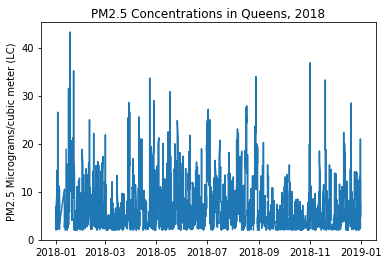

In [22]:
plt.plot(pd.to_datetime(queens["Date"]), queens["Measurement"])

plt.title("PM2.5 Concentrations in Queens, 2018")
plt.ylabel("PM2.5 Micrograms/cubic meter (LC)")

*Your observations here*

**Question 3.4:** Let's try plotting values only in the months of January and February, and then only in the months of July and August. Create the dataframe `queens_winter` containing January and February values and `queens_summer` containing June and July values, and then run the corresponding cells. What do you notice about the two plots?

(0, 50)

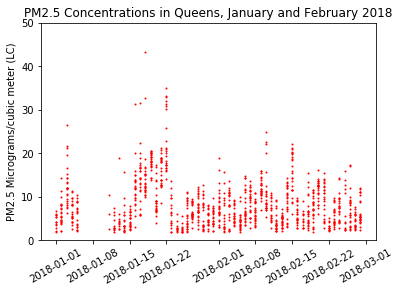

In [23]:
queens_winter = queens[(queens["Date"].str.contains("2018-01")) | 
                       (queens["Date"].str.contains("2018-02"))]

plt.plot(pd.to_datetime(queens_winter["Date"]), queens_winter["Measurement"], 'ro', markersize=1)

plt.title("PM2.5 Concentrations in Queens, January and February 2018")
plt.ylabel("PM2.5 Micrograms/cubic meter (LC)")
plt.xticks(rotation = 30)
plt.ylim((0,50))

(0, 50)

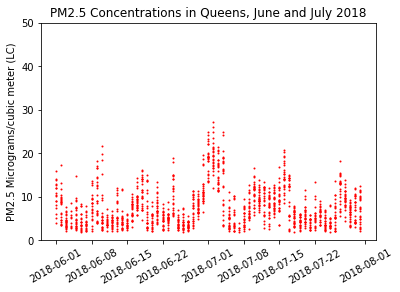

In [24]:
queens_summer = queens[(queens["Date"].str.contains("2018-06")) | 
                       (queens["Date"].str.contains("2018-07"))]

plt.plot(pd.to_datetime(queens_summer["Date"]), queens_summer["Measurement"], 'ro', markersize = 1)

plt.title("PM2.5 Concentrations in Queens, June and July 2018")
plt.ylabel("PM2.5 Micrograms/cubic meter (LC)")
plt.xticks(rotation = 30)
plt.ylim((0,50))

*Your observations here*

**Question 3.4:** Do the data support the observation that PM2.5 concentrations are on average higher in colder months than warmer months? Why or why not? What are some of the limitations of either our data or the methods we've used to explore it so far in allowing us to observe seasonal trends?

*Your answer here*

**Question 3.5:** In Susan Athey's essay "Beyond Prediction", Athey defines the distinction between prediction problems and causal inference problems. Thinking about this air quality dataset, can you come up with one question that poses a prediction problem (also referred to a resource allocation problem in the essay) and another that poses a causal inference problem? The two questions you come up with should be air quality related, but you don't have to limit yourself to this dataset (eg. it's totally fair to come up with a question that would also incorporate, for example, census or demographic data).

*Your answer here*

----

## Section 4: California Data<a id='cadata'></a>

Let's explore data that hits a little closer to home. In this section, we will look at air quality trends in California - more specifically Butte County. California is known for its wildfires and last year 5 California cities made it to the [top 10 worst cities for air quality in the United States and Canada](https://www.theguardian.com/cities/datablog/2017/feb/13/most-polluted-cities-world-listed-region). We will use data analysis to see how the fires have impacted PM2.5 cocentrations.

<br>**Question 4.1:** Create a dataframe called `PM25_2018_CA` that is a subset of `state_table` and just has PM2.5 2018 California data.

In [25]:
PM25_2018_CA = state_table[state_table["State"] == "California"]

In [26]:
PM25_2018_CA.head()

,Date,Time,Measurement,MDL,Units,State,County
0,2018-01-01,00:00,62.0,5.0,Micrograms/cubic meter (LC),California,Alameda
1,2018-01-01,01:00,57.0,5.0,Micrograms/cubic meter (LC),California,Alameda
2,2018-01-01,02:00,62.0,5.0,Micrograms/cubic meter (LC),California,Alameda
3,2018-01-01,03:00,48.0,5.0,Micrograms/cubic meter (LC),California,Alameda
4,2018-01-01,04:00,63.0,5.0,Micrograms/cubic meter (LC),California,Alameda


<br>**Question 4.3:** Find the mean PM2.5 concentrations in each county. 

*hint: `groupby` is a helpful operation*

In [27]:
PM25_2018_CA.groupby(["County"]).mean()

,Measurement,MDL
County,,
Alameda,12.963166,5.000000
Calaveras,14.691554,2.000000
Colusa,10.543195,5.000000
Contra Costa,13.010332,5.000000
Del Norte,7.871284,0.100000
Fresno,13.274031,3.225123
Inyo,7.276046,1.049176
Kern,7.397555,3.530173
Kings,17.469714,2.000000


----
Camp Fire, which started in November 2018,  that started on October 8 was described as the [‘deadliest, most destructive wildfire in California history’](https://www.washingtonpost.com/nation/2018/11/25/camp-fire-deadliest-wildfire-californias-history-has-been-contained/?noredirect=on).

UC Berkeley students could smell and see the effects of the fires in Butte County. November 9, 2018 was one of the peak days that the fires were burning and we will analyze its effects on PM2.5 concentrations on this day.

**Question 4.4:** Using `PM25_2018_CA`, create a table containing just information from Napa County on November 9, 2018 (although the fires occurred in Butte County, you'll notice from the list of unique counties that we don't have measurements for Butte - so we'll look at values in a nearby county).

In [28]:
napa_nov9 = PM25_2018_CA[(PM25_2018_CA["County"] == "Napa") & (PM25_2018_CA["Date"] == "2018-11-09")]

In [29]:
napa_nov9.head()

,Date,Time,Measurement,MDL,Units,State,County
276997,2018-11-09,00:00,84.0,5.0,Micrograms/cubic meter (LC),California,Napa
276998,2018-11-09,01:00,88.0,5.0,Micrograms/cubic meter (LC),California,Napa
276999,2018-11-09,02:00,86.0,5.0,Micrograms/cubic meter (LC),California,Napa
277000,2018-11-09,03:00,94.0,5.0,Micrograms/cubic meter (LC),California,Napa
277001,2018-11-09,04:00,84.0,5.0,Micrograms/cubic meter (LC),California,Napa


**Question 4.5:** Using `PM25_2018_CA`, create a table containing just information from Napa County on November 1, 2018.

In [30]:
napa_nov1 = PM25_2018_CA[(PM25_2018_CA["County"] == "Napa") & (PM25_2018_CA["Date"] == "2018-11-01")]

In [31]:
napa_nov1.head()

,Date,Time,Measurement,MDL,Units,State,County
276808,2018-11-01,00:00,13.0,5.0,Micrograms/cubic meter (LC),California,Napa
276809,2018-11-01,01:00,8.0,5.0,Micrograms/cubic meter (LC),California,Napa
276810,2018-11-01,02:00,5.0,5.0,Micrograms/cubic meter (LC),California,Napa
276811,2018-11-01,03:00,6.0,5.0,Micrograms/cubic meter (LC),California,Napa
276812,2018-11-01,04:00,7.0,5.0,Micrograms/cubic meter (LC),California,Napa


**Question 4.6:** Merge `napa_nov9` and `napa_nov1` on `Time` to compare their PM2.5 concentrations side by side.

*Note:* If  two dataframes have the same column names when pandas executes a merge, it will append a '_x' to the first data frame column names and a '_y' to the second data frame column names.  The rename operation is meant to clarify things.  Be sure that it's renaming correctly!

In [32]:
napa_merge = napa_nov9.merge(napa_nov1, on = ["Time"])
napa_merge.rename(columns={'Measurement_x':'Nov9 PM2.5', 'Measurement_y':'Nov1 PM2.5'}, inplace = True)
napa_merge.head()

,Date_x,Time,Nov9 PM2.5,MDL_x,Units_x,State_x,County_x,Date_y,Nov1 PM2.5,MDL_y,Units_y,State_y,County_y
0,2018-11-09,00:00,84.0,5.0,Micrograms/cubic meter (LC),California,Napa,2018-11-01,13.0,5.0,Micrograms/cubic meter (LC),California,Napa
1,2018-11-09,01:00,88.0,5.0,Micrograms/cubic meter (LC),California,Napa,2018-11-01,8.0,5.0,Micrograms/cubic meter (LC),California,Napa
2,2018-11-09,02:00,86.0,5.0,Micrograms/cubic meter (LC),California,Napa,2018-11-01,5.0,5.0,Micrograms/cubic meter (LC),California,Napa
3,2018-11-09,03:00,94.0,5.0,Micrograms/cubic meter (LC),California,Napa,2018-11-01,6.0,5.0,Micrograms/cubic meter (LC),California,Napa
4,2018-11-09,04:00,84.0,5.0,Micrograms/cubic meter (LC),California,Napa,2018-11-01,7.0,5.0,Micrograms/cubic meter (LC),California,Napa


**Question 4.7:** Calcuate the mean PM2.5 measurements of both days. How do the PM2.5 concentrations will compare on these two dates?

In [33]:
print("Nov 9 mean: ", napa_merge["Nov9 PM2.5"].mean(), " micrograms/cubic meter")
print("Nov 1 mean: ", napa_merge["Nov1 PM2.5"].mean(), " micrograms/cubic meter")

Nov 9 mean:  43.291666666666664  micrograms/cubic meter
Nov 1 mean:  7.25  micrograms/cubic meter


Answer: ...

----

## Submission

Congrats, you're done with homework 2!

Before you submit, click **Kernel** --> **Restart & Clear Output**. Then, click **Cell** --> **Run All**. Then, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file through bCourses.

----

## Bibliography

- Yao, Ling, et al. - PM2.5 observations during the day vs at night. https://www.ncbi.nlm.nih.gov/pubmed/26426035
- Guardian News and Media - Air quality rankings in cities. https://www.theguardian.com/cities/datablog/2017/feb/13/most-polluted-cities-world-listed-region
- Washington Post - Camp Fire. https://www.washingtonpost.com/nation/2018/11/25/camp-fire-deadliest-wildfire-californias-history-has-been-contained/

---
Notebook developed by: Melissa Ly

Data Science Modules: http://data.berkeley.edu/education/modules